In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
%matplotlib inline
%cv2 inline
%cv inline

### Load in the Image and convert to Grayscale

We want to convert the image into grayscale to calculate the fractal dimension. When using box counting, it only cares whether the fractal is "in" the box or "not", meaning that color isn't important. A black and white image is suffice.

In [2]:
url = "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.galleryintell.com%2Fwp-content%2Fuploads%2F2013%2F03%2Fautumn_rhythm-pollock1.jpg&f=1&nofb=1&ipt=0dacbb7caed66a73a9cb62a6a6d083fce98ca424f1ab566c301687d8467d6762&ipo=images"

im = io.imread(url)
img = cv.cvtColor(im, cv.COLOR_BGR2RGB)

img_bw = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
img_bw_3chn = cv.cvtColor(img_bw, cv.COLOR_GRAY2BGR)

In [3]:
final_frame = cv.hconcat((img, img_bw_3chn))
cv.imshow('images', final_frame)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread (0x3b9ee80).
Cannot move to target thread (0x3c239e0)

QObject::moveToThread: Current thread (0x3c239e0) is not the object's thread

### Crop Image to 1024x1024

We need to standardize the image that we will be performing the calculation on. We want to use a square so we can evenly scale down the boxes when doing box counting. We also want to have each square crop from an image to be the same size so that there will be an equal amount of scales per photo.

We choose to make the height and width 1024 because it is a power of 2 which makes scaling down uniform.

In [37]:
print(img_bw.ndim)
print(img_bw.shape)

2
(1602, 3102)


In [56]:
# Images must be at least 1024x1024

height, width = img_bw.shape
fin_img = img_bw[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]

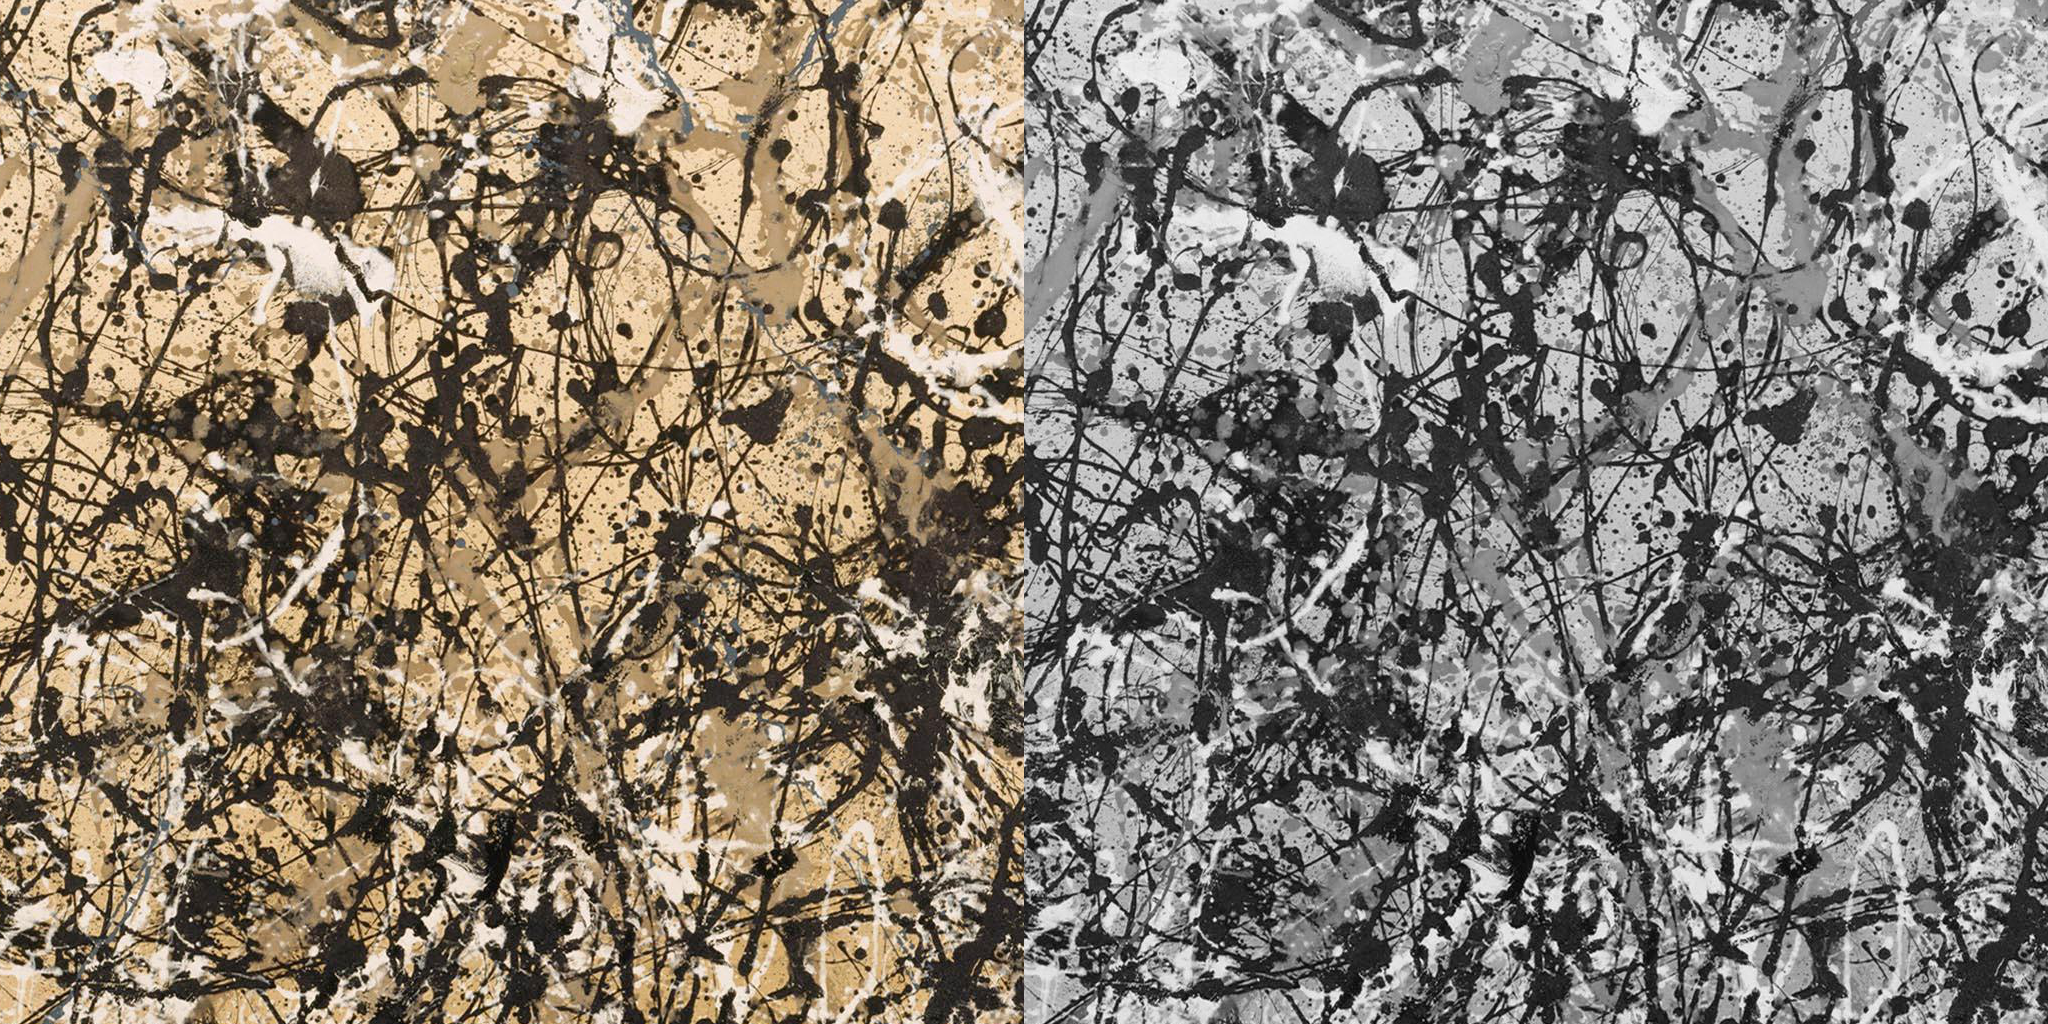

In [57]:
# Show images

color_crop = img[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]
bw_crop = img_bw_3chn[int(height/2)-512:int(height/2)+512, int(width/2)-512:int(width/2)+512]
final_frame = cv.hconcat((color_crop, bw_crop))
cv2_imshow(final_frame)

### Threshold image (convert to binary array)

We have to make a desicion on how we decide to threshold the image. The thresh between what becomes white or black will greatly effect the outcome of calculating the fractal dimension

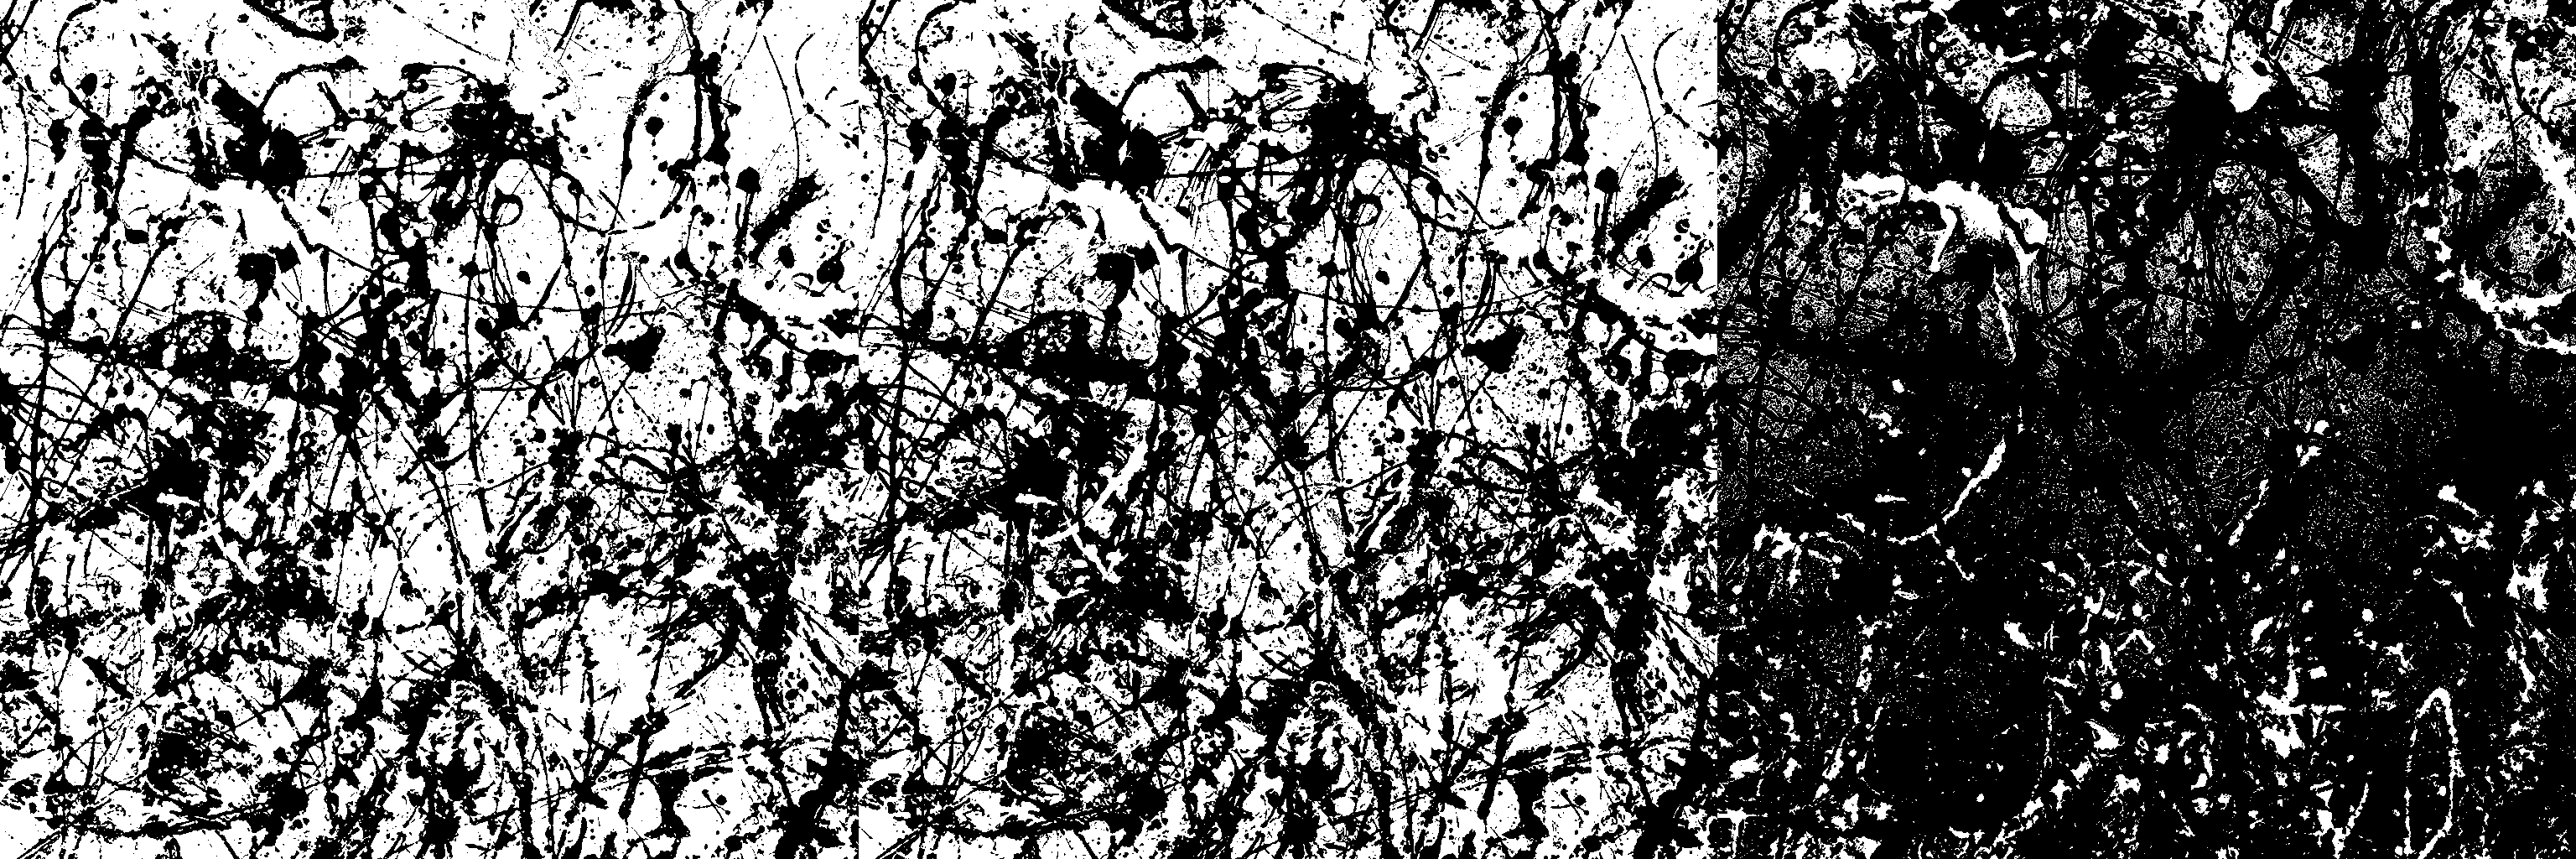

In [58]:
ret,thresh1 = cv.threshold(fin_img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(fin_img,127,255,cv.THRESH_BINARY)
ret,thresh3 = cv.threshold(fin_img,200,255,cv.THRESH_BINARY)
final_frame = cv.hconcat((thresh1, thresh2, thresh3))
cv2_imshow(final_frame)

We will figure out the average value of the image and let that be the threshold.

In [59]:
avg = np.mean(fin_img)
print(avg)

122.65687942504883


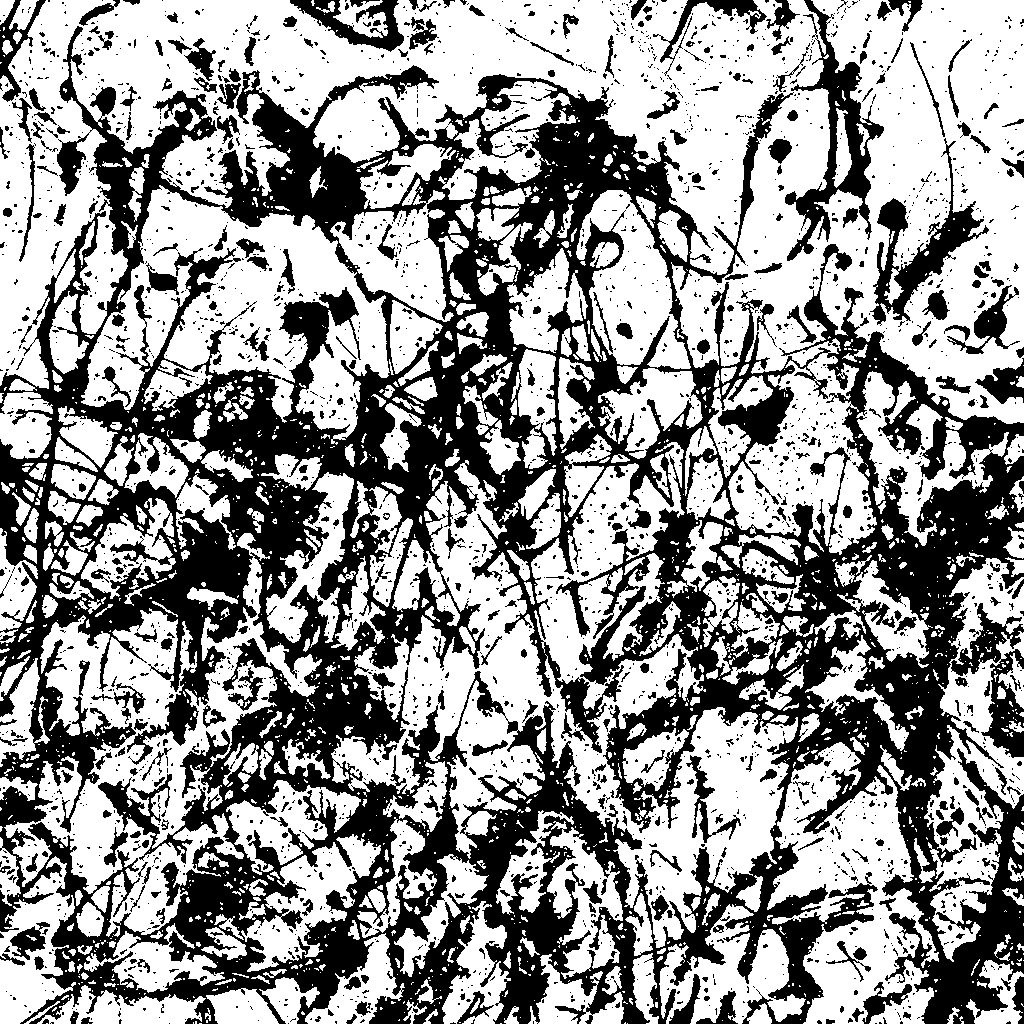

In [60]:
ret,fin_thresh = cv.threshold(fin_img,100,255,cv.THRESH_BINARY)
cv2_imshow(fin_thresh)

In [89]:
print(fin_thresh)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


### Calculating the Fractal Dimension

In [84]:
# Information

for i in range (9, -1, -1):
  print(f'Scaling Factor: {1024//2**i}')
  print(f'Box Size (in pixels): {2**i}x{2**i}')
  print(f'Number of Boxes: {(1024//2**i)**2}\n')

Scaling Factor: 2
Box Size (in pixels): 512x512
Number of Boxes: 4

Scaling Factor: 4
Box Size (in pixels): 256x256
Number of Boxes: 16

Scaling Factor: 8
Box Size (in pixels): 128x128
Number of Boxes: 64

Scaling Factor: 16
Box Size (in pixels): 64x64
Number of Boxes: 256

Scaling Factor: 32
Box Size (in pixels): 32x32
Number of Boxes: 1024

Scaling Factor: 64
Box Size (in pixels): 16x16
Number of Boxes: 4096

Scaling Factor: 128
Box Size (in pixels): 8x8
Number of Boxes: 16384

Scaling Factor: 256
Box Size (in pixels): 4x4
Number of Boxes: 65536

Scaling Factor: 512
Box Size (in pixels): 2x2
Number of Boxes: 262144

Scaling Factor: 1024
Box Size (in pixels): 1x1
Number of Boxes: 1048576



In [95]:
sArr = []
nArr = []

for i in range(9, -1, -1):
  print(f'Iteration {10-i}')
  scalingFactor = 1024//2**i
  boxSize = 2**i
  numberOfBoxes = (1024//2**i)**2
  n = 0

  # iterate through each box
  for row in range(scalingFactor):
    for col in range(scalingFactor):
      # iterate through each pixel in a box
      found = False 
      for x in range(row*boxSize, (row+1)*boxSize):
        for y in range(col*boxSize, (col+1)*boxSize):
          if fin_thresh[x][y] == 0:
            found = True
            n += 1
            break
        if found:
          break
  sArr.append(scalingFactor)
  nArr.append(n)

print(sArr)
print(nArr)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[4, 16, 64, 256, 1023, 3922, 13451, 42151, 129966, 427023]


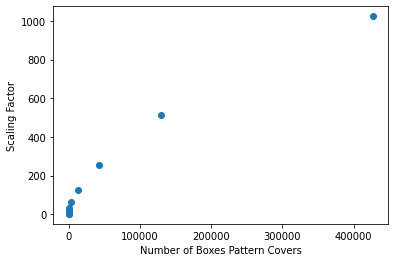

In [99]:
plt.plot(nArr, sArr, 'o')
plt.xlabel('Number of Boxes Pattern Covers')
plt.ylabel('Scaling Factor')
plt.show()